In [1]:
%%html
<style type='text/css'>
.CodeMirror{
    font-size: 18px;
}

div.output_area pre {
    font-size: 16px;
}
</style>

# 0. Cập nhật phiên bản mới cho matplotlib

In [2]:
# %pip install --upgrade matplotlib

In [1]:
import matplotlib
from matplotlib import pyplot as plt
print(matplotlib.__version__)

3.6.2


# 1. Biểu đồ cột: bar()

### 1.1. Biểu đồ cột đơn giản

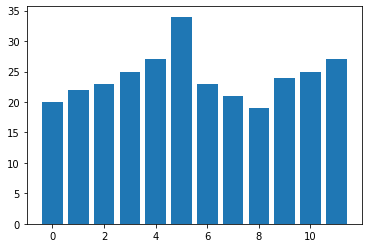

In [4]:
ds1 = [20,22,23,25,27,34, 23, 21, 19, 24, 25, 27]

plt.bar(range(len(ds1)), ds1)
plt.show()

**Thêm màu sắc và chỉnh sửa xticks**

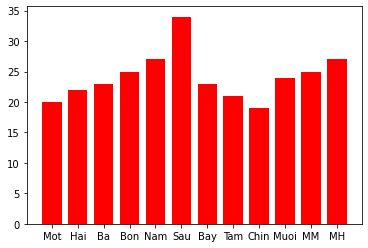

In [5]:
# Chỉnh sửa xticklabels
plt.bar(x=range(len(ds1)), 
        height=ds1, 
        color='r', width=0.75) # width: độ rộng của cột, linewidth: độ rộng đường viền

# x_list = [i+1 for i in range(len(ds1))]
x_list = ["Mot", 'Hai', 'Ba', 'Bon', 'Nam', 'Sau', 'Bay', 'Tam', 'Chin', 'Muoi', 'MM', 'MH']
plt.xticks(
            ticks=range(len(ds1)),         # vị trí
            labels=x_list,          # giá trị in ra
          )

plt.show()

**Biểu đồ cột với giá trị âm**

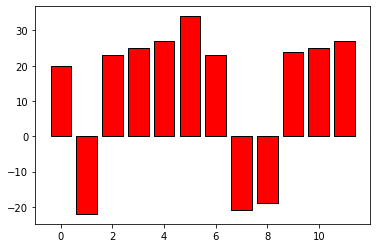

In [6]:
# Đồng thời thử đổi màu của đường viền quanh cột với edgecolor
ds2 = [20, -22,23,25,27,34, 23, -21, -19, 24, 25, 27]

plt.bar(x=range(len(ds2)), height=ds2, edgecolor = "k", color='r', linewidth=1)
plt.show()

### 1.2. Biểu đồ cột với scale khác nhau

In [7]:
# Dữ liệu
ds1 = [20, 22, 23, 25, 27, 34, 23, 21, 19, 20]
ds2 = [24, 25, 24, 21, 22, 26, 18, 25, 24, 27]

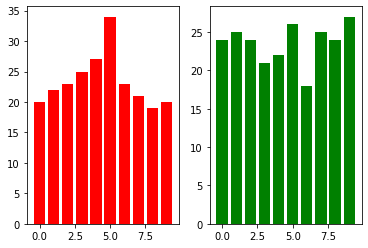

In [8]:
# Tạo nhanh subplot từ plt (thay vì fig.add_subplot)
ax1 = plt.subplot(1,2,1) 
# tai sao goi ax mà gọi plt?, tạo ax1, plt trỏ tới ax đó, tự động nhảy vào ax đó vẽ
plt.bar(x=range(len(ds1)), height=ds1, color="red")

ax2 = plt.subplot(1,2,2)
plt.bar(x=range(len(ds2)), height=ds2, color="green") # = ax2.bar

plt.show()

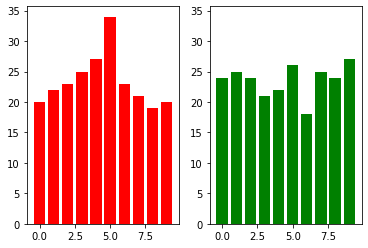

In [9]:
# Chỉnh lại scale bằng tham số sharey
fig = plt.figure()
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2, sharey=ax1)

ax1.bar(x=range(len(ds1)), height=ds1, color="red")
ax2.bar(x=range(len(ds2)), height=ds2, color="green")

plt.show()

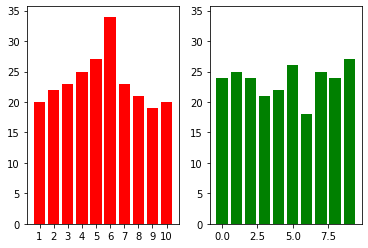

In [10]:
# Chỉnh vị trí in xtick_label
fig = plt.figure()
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2, sharey=ax1)

x1 = range(len(ds1))
ax1.bar(x=x1, height=ds1, color="red", align="center")
ax1.set_xticks(x1)
ax1.set_xticklabels([i+1 for i in x1])

x2 = range(len(ds2))
ax2.bar(x=x2,height=ds2, color="green")

plt.show()

### 1.3. Biểu đồ dạng nhóm (group)

**Biểu đồ dạng nhóm (group) với 2 giá trị**

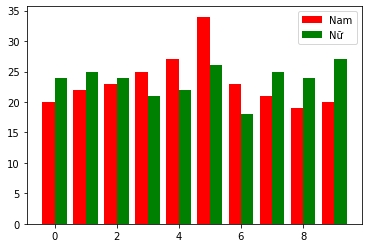

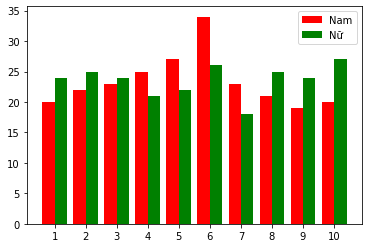

In [11]:
# Cách thực hiện: thiết lập vị trí trên trục x cho phù hợp
plt.bar(x=x1, height=ds1, width=0.4, color="red", label="Nam")

x2 = [i+0.4 for i in x1]
plt.bar(x=x2, height=ds2, width=0.4, color="green", label="Nữ")

plt.xticks([i+0.2 for i in x1], [i+1 for i in x1])

plt.legend()
plt.show()

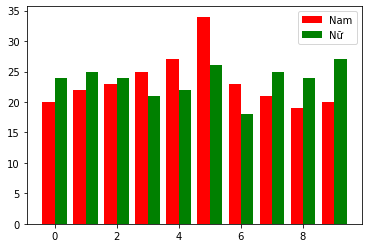

In [12]:
# Cách thực hiện: thiết lập vị trí trên trục x cho phù hợp
plt.bar(x=[i-0.2 for i in x1], height=ds1, width=0.4, color="red", label="Nam")

x2 = [i+0.2 for i in x1]
plt.bar(x=x2, height=ds2, width=0.4, color="green", label="Nữ")

plt.legend()
plt.show()

**Biểu đồ dạng chồng lên nhau**

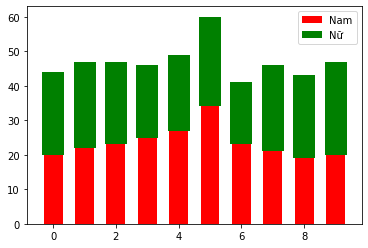

In [13]:
# set giá trị cho tham số bottom ở thông số thứ 2
plt.bar(x=x1, height=ds1, width=0.6, color="red", label="Nam")

plt.bar(x=x1, height=ds2, width=0.7, color="green", label="Nữ", bottom=ds1)

plt.legend()
plt.show()

**Thêm số biểu diễn giá trị thành phần**

In [2]:
# Dùng hàm ax.bar_label()
plt.bar(x=x1, height=ds1, width=0.7, color="red", label="Nam")
plt.bar(x=x1, height=ds2, width=0.8, color="green", label="Nữ", bottom=ds1)

# Lưu ý: hiển thị tổng 
ax = plt.gca() # Get-Current-Axes
ax.bar_label(container = ax.containers[0], color='w', padding=-15)
#ax.bar_label(container = ax.containers[1], color='b') # đang in tổng, ko phải gt cụ thể
ax.bar_label(container = ax.containers[1], color='b', label_type="center")

plt.legend()
plt.show()

NameError: name 'x1' is not defined

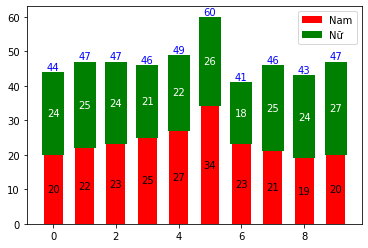

In [15]:
# Thêm số biểu diễn giá trị thành phần
plt.bar(x=x1, height=ds1, width=0.6, color="red", label="Nam")
plt.bar(x=x1, height=ds2, width=0.7, color="green", label="Nữ", bottom=ds1)

ax = plt.gca()

# Các thành phần
ax.bar_label(container = ax.containers[0], label_type='center')
ax.bar_label(container = ax.containers[1], label_type='center', color='w')

# Tổng, ko dùng container 0
ax.bar_label(container = ax.containers[1], color='b', label_type='edge')

plt.legend()
#plt.show()

### 1.4. Biểu đồ nằm ngang

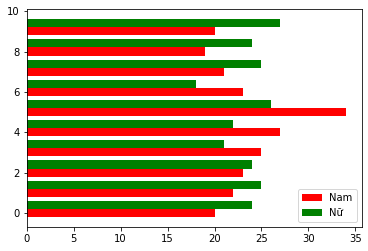

In [16]:
# Thay vì set vị trí trên trục x ==> vị trí trên trục y
plt.barh(y=[i-0.0 for i in x1], width=ds1, height=0.4, color="red", label="Nam")
plt.barh(y=[i+0.2 for i in x2], width=ds2, height=0.4, color="green", label="Nữ")
plt.legend(loc='lower right')
plt.show()

**Biểu đồ nằm ngang dạng nối tiếp nhau**

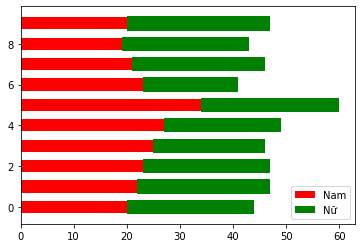

In [17]:
# set giá trị cho tham số "left" = chiều cao của ds
plt.barh(y=x1, width=ds1, height=0.6, color="red", label="Nam")
plt.barh(y=x1, width=ds2, height=0.7, color="green", label="Nữ", left = ds1)
plt.legend(loc='lower right')
plt.show()

### 1.5. Biểu đồ stem (tương tự biểu đồ cột)

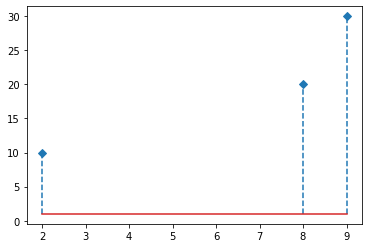

In [18]:
x = [2,8,9]
y1 = [10, 20, 30]
plt.stem(x,y1, linefmt='--', markerfmt="D", bottom=1)
plt.show()
# stem([x,] y, linefmt=None, markerfmt=None, basefmt=None)

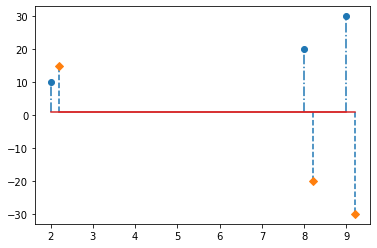

In [19]:
# Có thể vẽ biểu đồ stem dạng group như cột
y2 = [15, -20, -30]
plt.stem(x,y1, linefmt='-.', markerfmt="o", bottom=1)
plt.stem([i+0.2 for i in x], y2, linefmt='--', markerfmt="D", bottom=1)
plt.show()
# stem([x,] y, linefmt=None, markerfmt=None, basefmt=None)

## 2. Biểu đồ histogram

### 2.1. Ví dụ

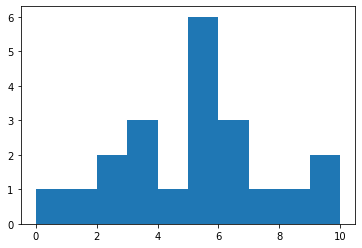

In [20]:
a = [0, 1, 2, 2, 3, 3, 3, 4, 5, 5, 5, 5, 5, 5.6, 6, 6, 6, 7, 8, 9, 10]

plt.hist(a)
plt.show()

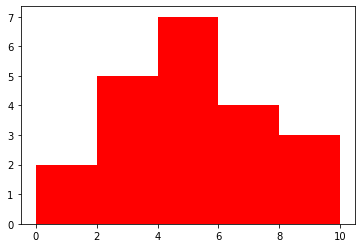

In [21]:
# Histogram với bins tự xác định, mặc định là 10
fig,ax = plt.subplots()
ax.hist(a, 
        bins=5,
        color='r', 
        #edgecolor='k',
        #align="right"
       )
plt.show()

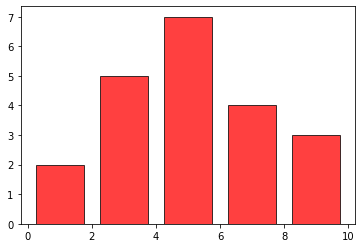

In [22]:
# chỉnh sửa chiều rộng của cột hiển thị
# width/rwidth
plt.hist(a, bins=5, 
         rwidth=0.75,
         # width=1,
         facecolor='red', edgecolor='k',
         alpha=0.75)
plt.show()

### 2.2. Ví dụ phân bố đều

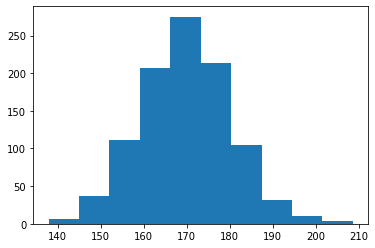

In [23]:
# Thử vẽ một phân bố chuẩn
import numpy as np

np.random.seed(100)
x = np.random.normal(170, 10, 1000)

plt.hist(x)
plt.show()

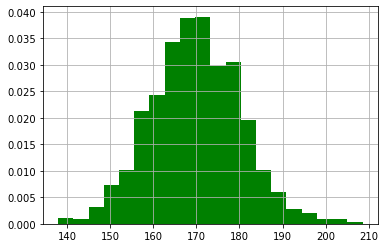

In [24]:
# Tăng số lượng bins để hiển thị chi tiết hơn
plt.hist(x, 
         bins=20, 
         color='g', 
         density=True # Dạng xác suất, nếu = False: số đếm tuyệt đối
        )
plt.grid()
plt.show()

**Chọn hướng nằm ngang**

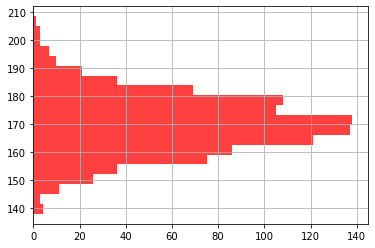

In [25]:
# Chỉnh sửa màu và độ mờ, hướng ngang
plt.hist(x, bins=20, color='red', alpha=0.75, orientation="horizontal")
plt.grid()
plt.show()

**So sánh phân bố của vài dữ liệu khác nhau**

In [26]:
# Giả sử: có 2 phân bố về chiều cao của Nam/Nữ

x = np.random.normal(170, 10, 10000)
y = np.random.normal(155, 20, 10000)

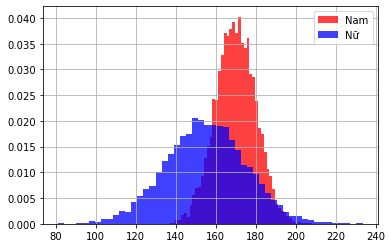

In [27]:
plt.hist(x, bins=50, facecolor='red', density=True, alpha=0.75)
plt.hist(y, bins=50, facecolor='blue', density=True, alpha=0.75)

plt.legend(["Nam", "Nữ"])
plt.grid()
plt.show()

## 3. Biểu đồ scatter

In [28]:
x = [5,7,8,7,2,17,2,9,4,11,12,9,6]
y = [99,86,87,88,111,76,103,87,94,78,77,85,86]

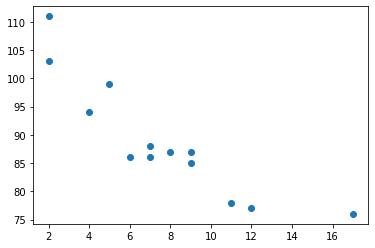

In [29]:
plt.scatter(x=x, y=y)
plt.show()

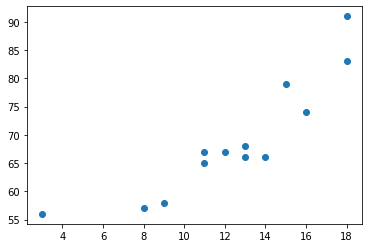

In [30]:
# Thời gian tự học vs. khả năng nắm bắt khóa học này (giả định)
plt.scatter([20 - i for i in x], [i - 20 for i in y])
plt.show()

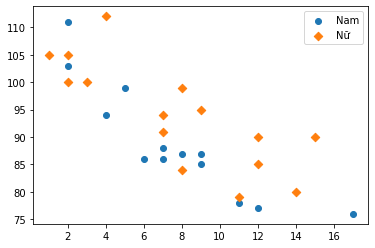

In [31]:
# Vẽ scatter cho 2 quan sát dữ liệu khác nhau
plt.scatter(x, y, label='Nam')

x2 = [2,2,8,1,15,8,12,9,7,3,11,4,7,14,12]
y2 = [100,105,84,105,90,99,90,95,94,100,79,112,91,80,85]
plt.scatter(x2, y2, label='Nữ', marker='D')

plt.legend()
plt.show()

**Biểu diễn scatter với các màu và kích thước khác nhau**

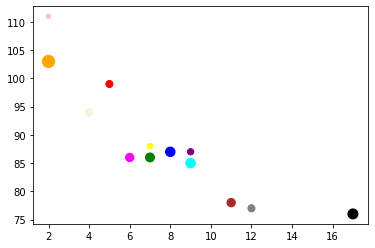

In [32]:
colors=["red","green","blue","yellow","pink","black",
        "orange","purple","beige","brown","gray","cyan","magenta"]
sizes=[50, 80, 90, 30, 20, 100, 150, 40, 60, 70, 50, 90, 70]
plt.scatter(x, y, color=colors, sizes=sizes)
plt.show()

**Biểu đồ scatter cho phân nhóm**

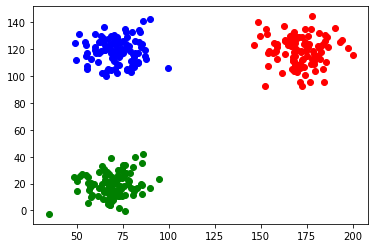

In [33]:
fig, ax = plt.subplots()

x1 = np.random.normal(170, 10, 100)
y1 = np.random.normal(120, 10, 100)
ax.scatter(x1, y1, c='red')

x2 = np.random.normal(70, 10, 100)
y2 = np.random.normal(20, 10, 100)
ax.scatter(x2, y2, c='green')

x3 = np.random.normal(70, 10, 100)
y3 = np.random.normal(120, 10, 100)
ax.scatter(x3, y3, c='blue')

plt.show()

## 4. Biểu đồ area

In [34]:
# Sử dụng stackplot 
x = [1, 2, 3, 4, 5]

y1 = [1, 1, 2, 3, 5]
y2 = [0, 4, 2, 6, 8]
y3 = [1, 3, 5, 7, 9]

labels = ["CN1", "CN2", "CN3"]

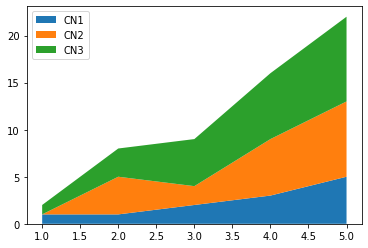

In [35]:
plt.stackplot(x, y1, y2, y3, labels = labels)

plt.legend(loc='upper left')
plt.show()

**Sử dụng stackplot với baseline khác**<br>
('zero', 'sym', 'wiggle', 'weighted_wiggle')

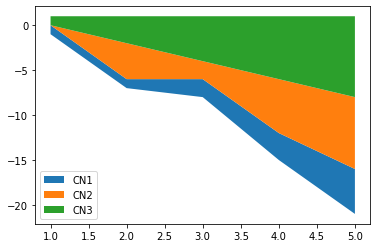

In [36]:
plt.stackplot(x, y1, y2, y3, labels=labels, baseline='weighted_wiggle')

plt.legend(loc='lower left')

plt.show()

## 5. Biểu đồ hình tròn

### 5.1. Biểu đồ tròn đơn giản

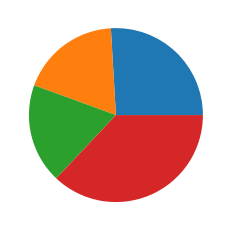

In [37]:
y = [35, 25, 25, 50]
plt.pie(y)
plt.show()

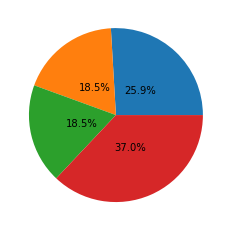

In [38]:
# Hiển thị số phần trăm
y = [35, 25, 25, 50]
plt.pie(y, autopct='%.1f%%', pctdistance=0.4) 

plt.show()

**Chỉnh vị trí và màu của text hiển thị %**

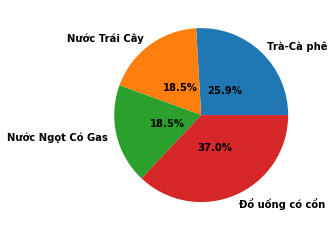

In [39]:
y = [35, 25, 25, 50]
plt.pie(y, autopct='%.1f%%', 
        pctdistance=0.4, 
        #colors=['r','y','c','o']
        textprops={'color':'k', 'weight':'bold'},
        labels=['Trà-Cà phê', 'Nước Trái Cây', 'Nước Ngọt Có Gas', 'Đồ uống có cồn']
       )

plt.legend(loc=[1,0]) #tạo menu ở ngoài biểu đồ
plt.show()

### 5.2. Thêm một số trang trí

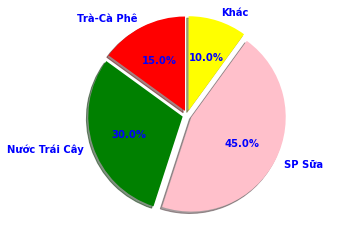

In [40]:
# 1. cho một mảnh nhô ra
# 2. Thay đổi góc bắt đầu
# 3. Thay đổi màu của các mảnh

# Thứ tự ngược chiều kim đồng hồ, bắt đầu từ vị trí 3h (0 độ):
labels = 'Trà-Cà Phê', 'Nước Trái Cây', 'SP Sữa', 'Khác'
sizes = [15, 30, 45, 10]
my_explode = (0.05, 0.05, 0.05, 0.05) # cho tp nào đó nổi bật lên, >0
my_colors = 'red', 'green', 'pink', 'yellow'

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        colors = my_colors,
        explode=my_explode, 
        textprops={'color':"b", 'weight':'bold'},
        shadow=True, 
        startangle=90, # Thay đổi góc bắt đầu, thay vì từ góc 0
       )

# hạn chế lỗi ko dc đều
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

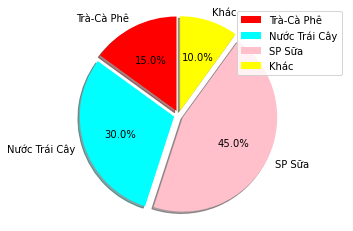

In [41]:
# Sử dụng legend thay vì nhãn
# Và cho tất cả các mảnh nhô ra
my_labels = 'Trà-Cà Phê', 'Nước Trái Cây', 'SP Sữa', 'Khác'
my_colors = 'red', 'cyan', 'pink', 'yellow'

plt.pie(sizes, 
        labels=my_labels,
        explode=[0.05]*len(sizes), 
        colors=my_colors, autopct='%1.1f%%',
        shadow=True, startangle=90, )
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.legend(labels=my_labels, loc="best")
plt.show()

### 5.3. Biểu đồ dạng hình quạt
(Set tham số normalize=False)

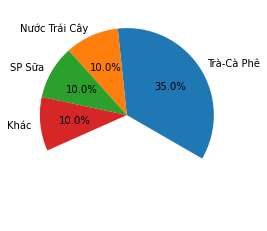

In [42]:
# Tổng phải nhỏ hơn 1.0, phải tự tính ra %, các số phải <1
y = [0.35, 0.10, 0.10, 0.10]
plt.pie(y, 
        normalize=False, 
        labels=my_labels, autopct='%1.1f%%',
        # textprops={'color':"w",'weight':'bold'}
        startangle=-30)
plt.legend(loc="low center")
plt.show()

## 6. Biểu đồ dạng Tree-map
**Lưu ý:** Cần phải cài module squarify vào Ananconda

In [3]:
# Cách cài đặt module squarify
# (Chạy câu lệnh command line ngay trên Jupyter Notebook)
%pip install squarify

Note: you may need to restart the kernel to use updated packages.


In [44]:
# Cách khác
!pip install squarify

**Biểu đồ tree-map đơn giản**

In [45]:
import squarify

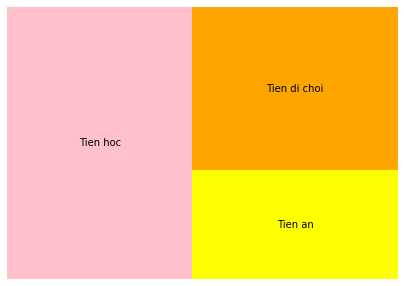

In [46]:
fig = plt.figure(figsize=(7,5))

squarify.plot(sizes=[45,20,30], 
              label=["Tien hoc", "Tien an", "Tien di choi"],
              color=['pink', 'yellow', 'orange'] # sẽ random màu mỗi lần chạy nếu ko set up cố định
             )
plt.axis("off") # tắt trục x, y
# plt.plot()
plt.show()

**Giả sử ta có dữ liệu về doanh thu theo mặt hàng như sau:**

In [47]:
volume = [1783, 1221, 1097, 839, 736, 493,
          472, 150, 105, 66, 50]
labels = ['Water\n volume: 1783k',
          'Coffe\n volume: 1221k',
          'Yogurt\n volume: 1097k',
          'Chocolate\n volume: 839k',
          'Juice\n volume: 736k',
          'Snacking\n volume: 493k',
          'Fruit\n volume: 472k',
          'Beef\n volume: 150k',
          'Ice-cream\n volume: 105k',
          'Salad\n volume: 66k',
          'Shampooing\n volume: 50k']
color_list = ['#0f7216', '#b2790c', '#ffe9a3',
              '#f9d4d4', '#d35158', '#ea3033']

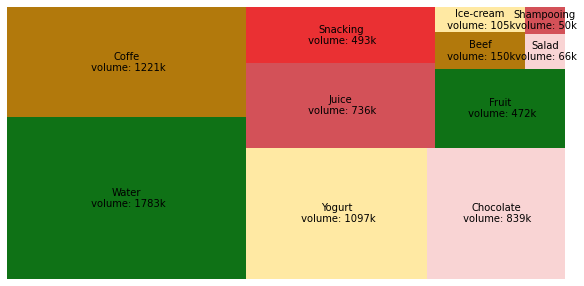

In [48]:
fig = plt.figure(figsize=(10,5))

squarify.plot(sizes=volume, 
              label=labels,
              color=color_list,
              )

plt.axis("off")
plt.show()

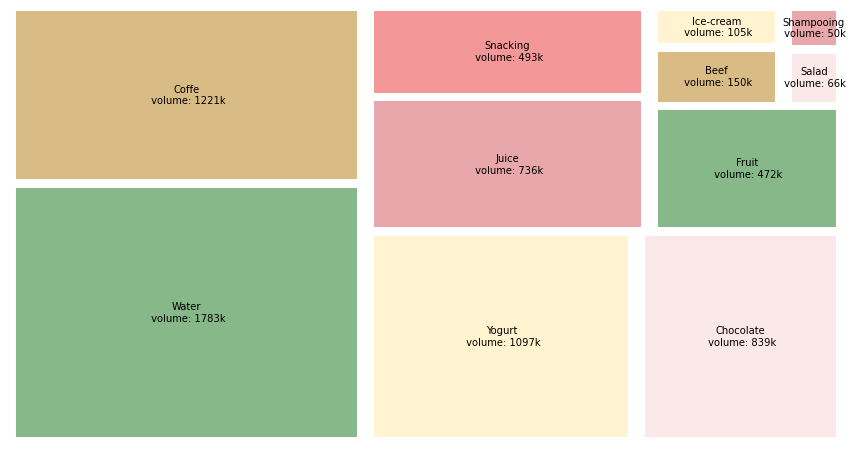

In [49]:
# Thiết lập màu sắc và thêm khoảng trắng
fig = plt.figure(figsize=(15,8))

squarify.plot(sizes=volume, label=labels,
              color=color_list, 
              alpha=0.5, # giảm độ đậm của màu
              pad=True, # thêm khoảng trắng các mảnh
             )

plt.axis("off")
plt.show()

**Sử dụng thêm `text_kwargs` và `bar_kwargs` để trang trí đẹp hơn**

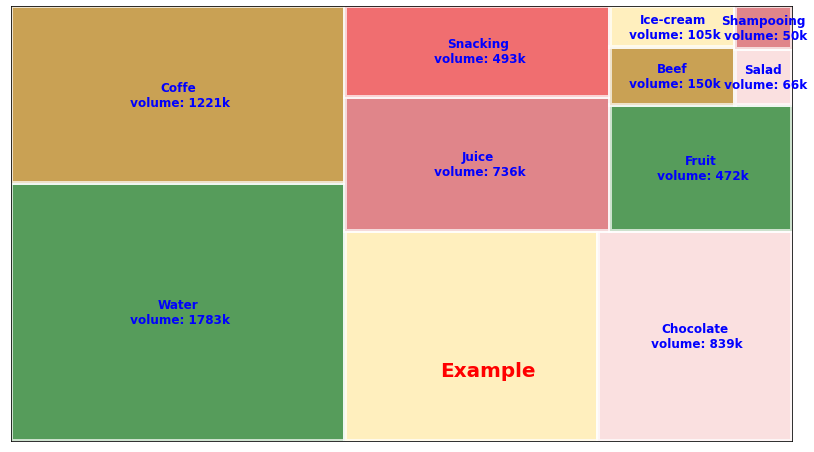

In [50]:
fig = plt.figure(figsize=(14,8))

labels = ['Water\n volume: 1783k',
          'Coffe\n volume: 1221k',
          '',
          'Chocolate\n volume: 839k',
          'Juice\n volume: 736k',
          'Snacking\n volume: 493k',
          'Fruit\n volume: 472k',
          'Beef\n volume: 150k',
          'Ice-cream\n volume: 105k',
          'Salad\n volume: 66k',
          'Shampooing\n volume: 50k']

ax = squarify.plot(sizes=volume, label=labels,
                   color=color_list, alpha=0.7,
                   # pad=True, 
                   text_kwargs={'fontsize':12, 'weight':'bold', 'color':'blue'},
                   bar_kwargs={'edgecolor':'w', 'linewidth':4}, 
                   # edge color: màu của cạnh
                  )
ax.set_xticks([]) # giữ lại đường màu đen phía ngoài
ax.set_yticks([])

ax.text(55,15,'Example', color='red', fontsize=20, fontweight='bold')

plt.show()

**Vẽ biểu đồ squarify trên subplots**

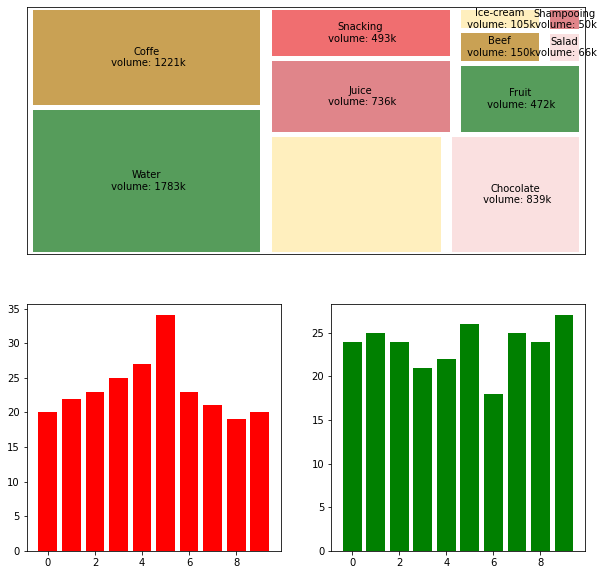

In [51]:
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(2, 1, 1)

squarify.plot(sizes=volume, label=labels,
              ax=ax1, # Lưu ý: không cần nếu plot ngay sau khi thêm ax1
              pad=True,
              color=color_list, alpha=0.7)
#plt.axis("off")
ax1.set_xticks([])
ax1.set_yticks([])

ax2 = fig.add_subplot(2, 2, 3)
ax3 = fig.add_subplot(2, 2, 4)

ds1 = [20, 22, 23, 25, 27, 34, 23, 21, 19, 20]
ds2 = [24, 25, 24, 21, 22, 26, 18, 25, 24, 27]
ax2.bar(x=range(len(ds1)), height=ds1, color="red", align="center")
ax3.bar(x=range(len(ds2)), height=ds2, color="green")

plt.show()

# Phụ lục: mở rộng và nâng cao

## 1. In danh sách các màu từ Python

In [52]:
import matplotlib.colors as colors
color_list = list(colors._colors_full_map.keys())
# color_list = list(colors._colors_full_map.values())
print(color_list)

['xkcd:cloudy blue', 'xkcd:dark pastel green', 'xkcd:dust', 'xkcd:electric lime', 'xkcd:fresh green', 'xkcd:light eggplant', 'xkcd:nasty green', 'xkcd:really light blue', 'xkcd:tea', 'xkcd:warm purple', 'xkcd:yellowish tan', 'xkcd:cement', 'xkcd:dark grass green', 'xkcd:dusty teal', 'xkcd:grey teal', 'xkcd:macaroni and cheese', 'xkcd:pinkish tan', 'xkcd:spruce', 'xkcd:strong blue', 'xkcd:toxic green', 'xkcd:windows blue', 'xkcd:blue blue', 'xkcd:blue with a hint of purple', 'xkcd:booger', 'xkcd:bright sea green', 'xkcd:dark green blue', 'xkcd:deep turquoise', 'xkcd:green teal', 'xkcd:strong pink', 'xkcd:bland', 'xkcd:deep aqua', 'xkcd:lavender pink', 'xkcd:light moss green', 'xkcd:light seafoam green', 'xkcd:olive yellow', 'xkcd:pig pink', 'xkcd:deep lilac', 'xkcd:desert', 'xkcd:dusty lavender', 'xkcd:purpley grey', 'xkcd:purply', 'xkcd:candy pink', 'xkcd:light pastel green', 'xkcd:boring green', 'xkcd:kiwi green', 'xkcd:light grey green', 'xkcd:orange pink', 'xkcd:tea green', 'xkcd:ve

**Thử chỉnh màu `edgecolor`**

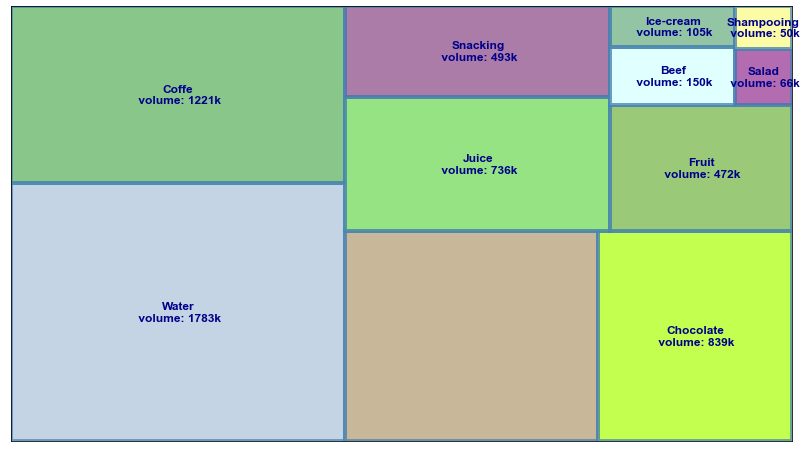

In [53]:
fig = plt.figure(figsize=(14,8))

ax = squarify.plot(sizes=volume, label=labels,
                   color=color_list, alpha=0.7,
                   # pad=True, 
                   text_kwargs={'fontsize':12, 'fontname':"Arial",'weight':'bold', 
                                'color':'darkblue'},
                   bar_kwargs=dict(linewidth=4, edgecolor="steelblue")
                  )
ax.set_xticks([])
ax.set_yticks([])

plt.show()

## 2. Thiết lập font cho nhãn

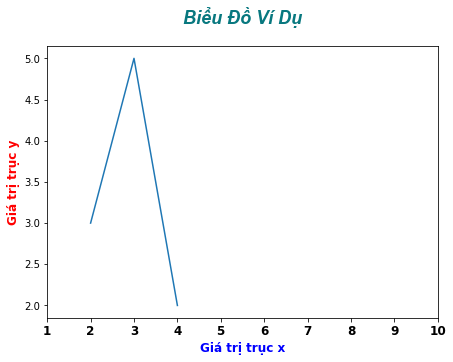

In [54]:
fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot()
ax.plot([1,2,3], [3,5,2])

# Font của các tiêu đề
ax.set_title("Biểu Đồ Ví Dụ", 
             loc='center',          # Các vị trí: left | center | right
             fontstyle='oblique', # Các style: normal | italic |  oblique
             fontname='Arial',
             weight='bold', fontsize=18,
             color='xkcd:deep aqua',
             pad=22
            )
ax.set_ylabel("Giá trị trục y", weight='bold', fontsize=12, color='red')
ax.set_xlabel("Giá trị trục x", weight='bold', fontsize=12, color='blue')

# Font của các trục
ax.set_xticks(range(10))
ax.set_xticklabels(range(1,11), fontsize=12, weight='bold')

plt.show()

## 3. Scatter với nhiều màu sắc ngẫu nhiên

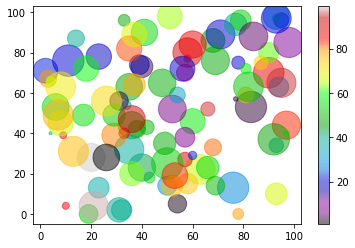

In [55]:
# Thử biểu diễn nhiều màu sắc
x = np.random.randint(100, size=(100))
y = np.random.randint(100, size=(100))
colors = np.random.randint(100, size=(100))
sizes = 10 * np.random.randint(100, size=(100))

plt.scatter(x, y, c=colors, s=sizes, alpha=0.5, cmap='nipy_spectral')
plt.colorbar()

plt.show() 

## 4. Tạo biểu đồ vùng với fill_between

In [56]:
x = [1, 2, 3, 4, 5]
y1 = [1, 1, 2, 3, 5]
y2 = [0, 4, 2, 6, 8]
y3 = [1, 3, 5, 7, 9]

labels = ["Fibonacci ", "Evens", "Odds"]

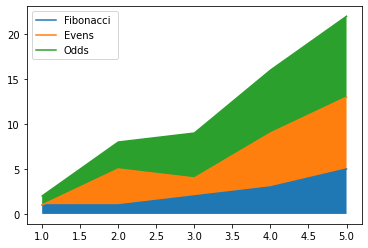

In [57]:
# Sử dụng fill_between
y2_new = [a+b for a,b in zip(y2,y1)]
y3_new = [a+b+c for a,b,c in zip(y3,y2,y1)]

plt.plot(x,y1)
plt.plot(x,y2_new)
plt.plot(x,y3_new)
plt.legend(loc='upper left', labels=labels)

plt.fill_between(x, y1, 0)
plt.fill_between(x, y2_new, y1)
plt.fill_between(x, y3_new, y2_new)

plt.show()

## 5. Biểu đồ với nhóm 3 tham số

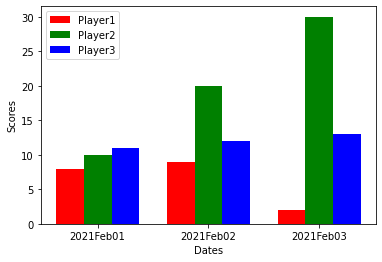

In [58]:
# Biểu đồ nhóm với 3 tham số
import numpy as np
  
ind = np.array([1,2,3]) 
width = 0.25
  
x = [8, 9, 2]
bar1 = plt.bar(ind, x, width, color = 'r')
  
y = [10, 20, 30]
bar2 = plt.bar(ind+width, y, width, color='g')
  
z = [11, 12, 13]
bar3 = plt.bar(ind+width*2, z, width, color = 'b')
  
plt.xlabel("Dates")
plt.ylabel('Scores')

# Sử dụng xticks để set vị trí của nhãn minh họa
plt.xticks(ind+width,['2021Feb01', '2021Feb02', '2021Feb03'])
plt.legend((bar1, bar2, bar3), ('Player1', 'Player2', 'Player3') )
plt.show()

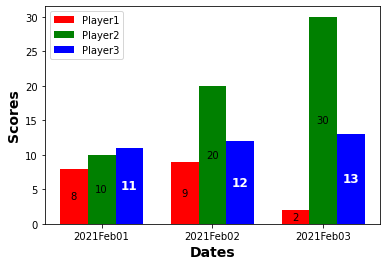

In [59]:
# Thêm số biểu thị thông tin từng cột
bar1 = plt.bar(ind, x, width, color = 'r')
bar2 = plt.bar(ind+width, y, width, color='g')
bar3 = plt.bar(ind+width*2, z, width, color = 'b')
  
plt.xlabel("Dates", fontsize=14, weight='bold')
plt.ylabel('Scores', fontsize=14, weight='bold')

ax = plt.gca()
ax.bar_label(container = ax.containers[0], padding=0, label_type='center')
ax.bar_label(container = ax.containers[1], padding=0, label_type='center')

# Chỉnh sử font của cột thứ 3
ax.bar_label(container = ax.containers[2], padding=0, label_type='center', 
             color='w', fontsize=12, weight='bold')

# Sử dụng xticks để set vị trí của nhãn minh họa
plt.xticks(ind+width,['2021Feb01', '2021Feb02', '2021Feb03'])
plt.legend((bar1, bar2, bar3), ('Player1', 'Player2', 'Player3') )
plt.show()

### 6. Làm mờ đi một mảnh của biểu đồ tròn<br>
(Cần nhận kết quả trả về từ hàm vẽ)

In [60]:
labels = 'Trà-Cà Phê', 'Nước Trái Cây', 'SP Sữa', 'Khác'
sizes = [0.15, 0.10, 0.25, 0.10]
explode = (0, 0.1, 0, 0)
colors = 'brown', 'green', 'pink', 'yellow'

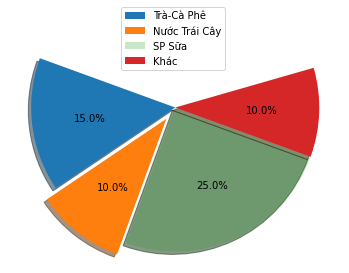

In [61]:
# Lấy ra patch để tiến hành xử lý thêm
# (Cho patch "SP Sữa" mờ đi)

kq = plt.pie(sizes, explode=explode, autopct='%1.1f%%',
             shadow=True, startangle=160, normalize=False)

patches, texts, autotexts = kq
patches[2].set_alpha(0.25)

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(labels, loc=[0.34, 0.9])
plt.show()

**Thiết lập màu text cho từng mảnh**

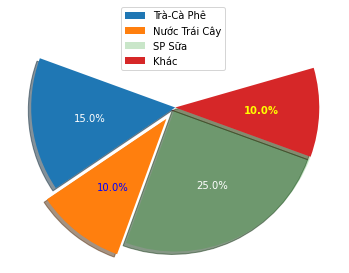

In [62]:
kq = plt.pie(sizes, explode=explode, autopct='%1.1f%%',
             shadow=True, startangle=160, normalize=False)

patches, texts, autotexts = kq
patches[2].set_alpha(0.25)

# Thiết lập màu text
autotexts[0].set_color('white')
autotexts[1].set_color('blue') # Mảnh màu cam
autotexts[2].set_color('white')
autotexts[3].set_color('yellow')
autotexts[3].set_fontweight('bold')

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(labels, loc=[0.34, 0.9])
plt.show()